In [ ]:
#imports

import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import datetime as dt

from wordcloud import WordCloud, STOPWORDS

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Internship/Sem-5/TASK-1/cleaned_data.csv")
data.head()

,reviews,stars,date,country,verified,corpus,sentiment
0,Not Verified | All 4 of our flights were fine ...,5,2023-12-18,United Kingdom,False,verified flight fine term comfort punctuality ...,Positive
1,cNot Verified | I had hoped this would be a g...,6,2023-12-17,United States,False,cnot verified hoped would good review unfortun...,Positive
2,✅ Trip Verified | I was going to fly to Frank...,4,2023-12-15,United Kingdom,True,going fly frankfurt glasgow london flight lond...,Positive
3,✅ Trip Verified | Much better experience this ...,1,2023-12-14,United Kingdom,True,much better experience time around flew cpt lh...,Positive
4,✅ Trip Verified | Once again a terrible busine...,8,2023-12-12,United Kingdom,True,terrible business class experience ba flight d...,Negative


In [ ]:
data.stars.mean()

4.61617345443891

Text(0.5, 0.98, 'Counts for each ratings')

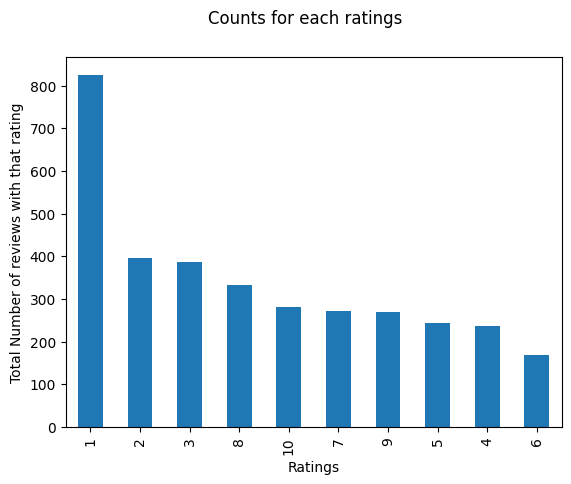

In [ ]:
data.stars.value_counts().plot(kind="bar")
plt.xlabel("Ratings")
plt.ylabel("Total Number of reviews with that rating")
plt.suptitle("Counts for each ratings")

In [ ]:
print(f"{len(data.country.unique())} unique countries")

70 unique countries


Text(0.5, 1.0, 'Maximum number of review by country')

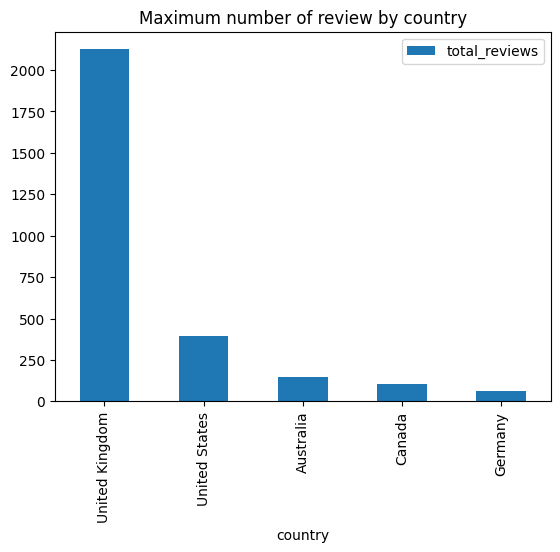

In [ ]:
data_country_review = pd.DataFrame(data.country.value_counts().head()).reset_index()
data_country_review.rename(columns={'index':'country','country':'total_reviews'}, inplace=True)
data_country_review.plot(kind="bar", x='country')
plt.title("Maximum number of review by country")

<ipython-input-48-4760e4188dbb>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



Text(0.5, 1.0, 'Top 12 Countries with avg highest rating provided to British Airways')

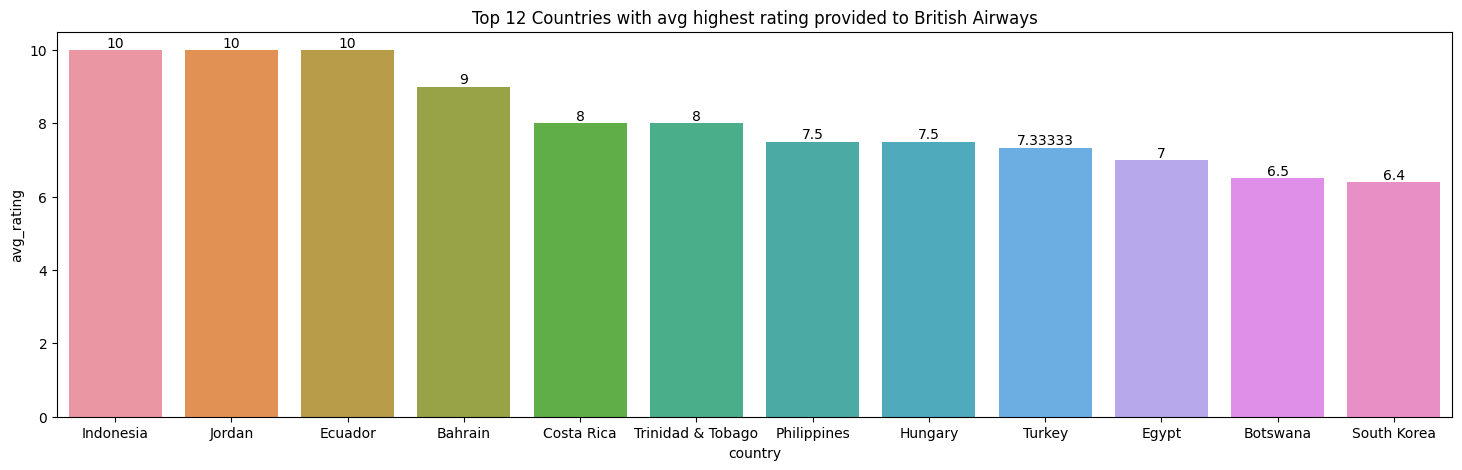

In [ ]:
data_country_rating = pd.DataFrame(data.groupby('country').mean()['stars'].sort_values(ascending=False)).reset_index()

data_country_rating.rename(columns={'stars':'avg_rating'}, inplace=True)

fig, ax = plt.subplots(figsize=(18,5))
ax1 = sns.barplot(x='country', y='avg_rating', data=data_country_rating[:12])
ax.bar_label(ax.containers[0])
ax.set_title("Top 12 Countries with avg highest rating provided to British Airways")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


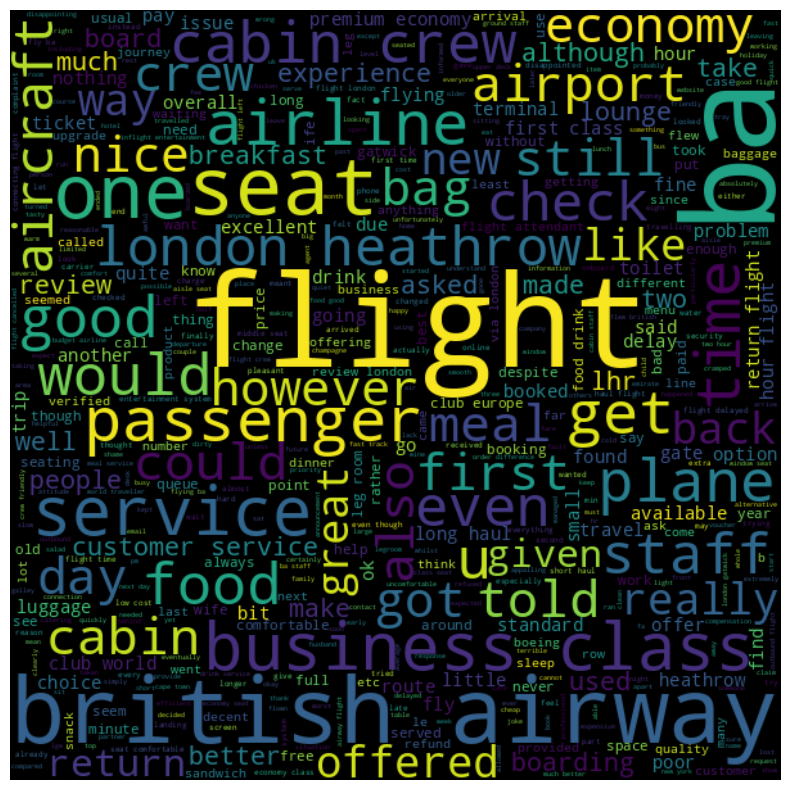

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
# Start with one review:
reviews = " ".join(data.corpus)
plt.figure(figsize=(20,10))

stopwords = set(stopwords.words('english'))

# Create and generate a word cloud image:
wordcloud = WordCloud(height=600,width=600,max_fo0nt_size=100, max_words=500, stopwords=stopwords).generate(reviews)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


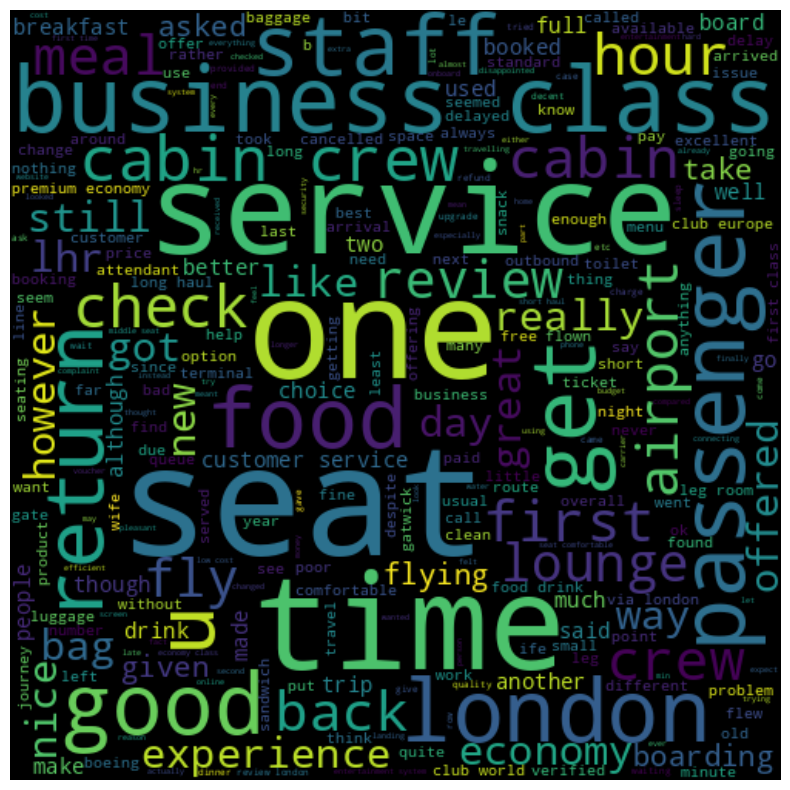

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
reviews = " ".join(data.corpus)
plt.figure(figsize=(20,10))

stop_words = set(stopwords.words('english'))
stop_words.update(["ba","flight", "british","airway", "airline","plane", "told","also","passenger" \
                 "london", "heathrow", "aircraft", "could","even", "would"])
# Create and generate a word cloud image:
wordcloud = WordCloud(height=500,width=500,max_font_size=100, max_words=300, stopwords=stop_words).generate(reviews)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
from nltk import ngrams
from nltk.probability import FreqDist

from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer

#split the text of all reviews into a list of words
words = reviews.split(" ")

#remove certain words that will not be used to determine the positive or negative sentiment
stopwords = text.ENGLISH_STOP_WORDS.union(['flight', 'ba', "passenger","u", "london","airway","british","airline",\
                                           "heathrow","plane","lhr","review"])


new_words = [word for word in words if word not in stopwords]

nlp_words=FreqDist(new_words).most_common(20)

#create a dataframe of these word and its frequencies
all_fdist = pd.Series(dict(nlp_words))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'seat'),
  Text(1, 0, 'service'),
  Text(2, 0, 'time'),
  Text(3, 0, 'food'),
  Text(4, 0, 'crew'),
  Text(5, 0, 'good'),
  Text(6, 0, 'cabin'),
  Text(7, 0, 'class'),
  Text(8, 0, 'hour'),
  Text(9, 0, 'business'),
  Text(10, 0, 'staff'),
  Text(11, 0, 'economy'),
  Text(12, 0, 'check'),
  Text(13, 0, 'drink'),
  Text(14, 0, 'meal'),
  Text(15, 0, 'lounge'),
  Text(16, 0, 'return'),
  Text(17, 0, 'club'),
  Text(18, 0, 'boarding'),
  Text(19, 0, 'customer')])

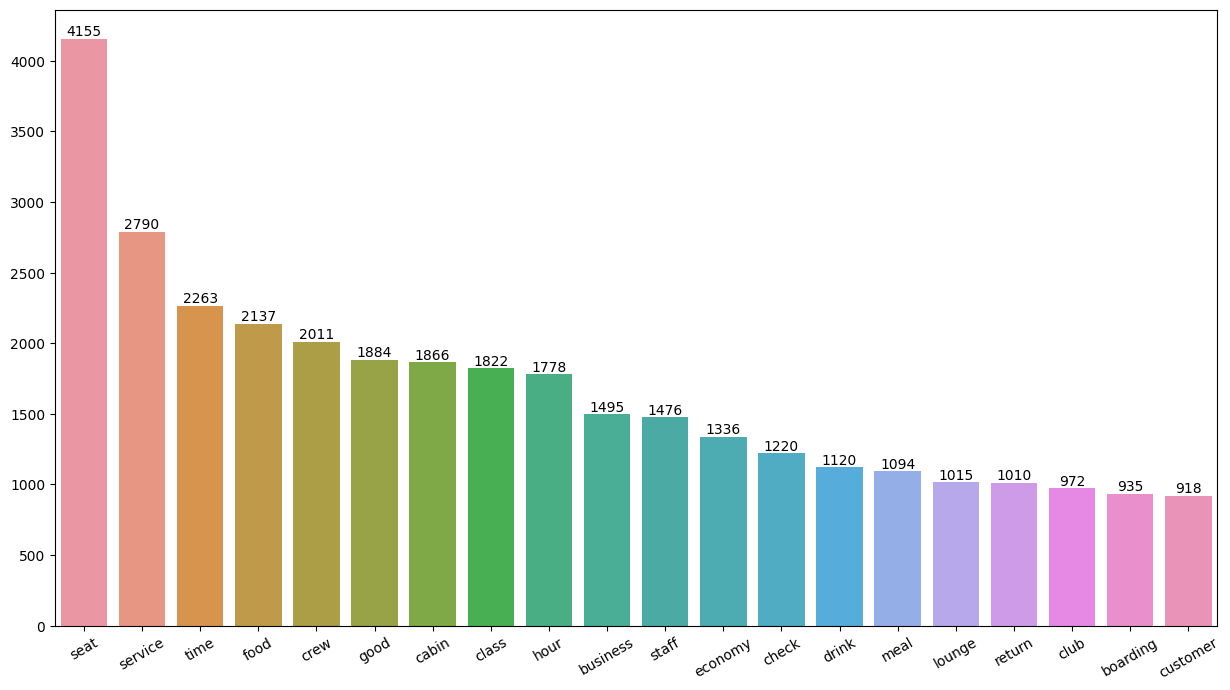

In [ ]:
## Setting figure, ax into variables
fig, ax = plt.subplots(figsize=(15,8))

## Seaborn plotting using Pandas attributes + xtick rotation for ease of viewing
all_plot = sns.barplot(x=all_fdist.index, y=all_fdist.values, ax=ax)
all_plot.bar_label(all_plot.containers[0])
plt.xticks(rotation=30)

<Axes: >

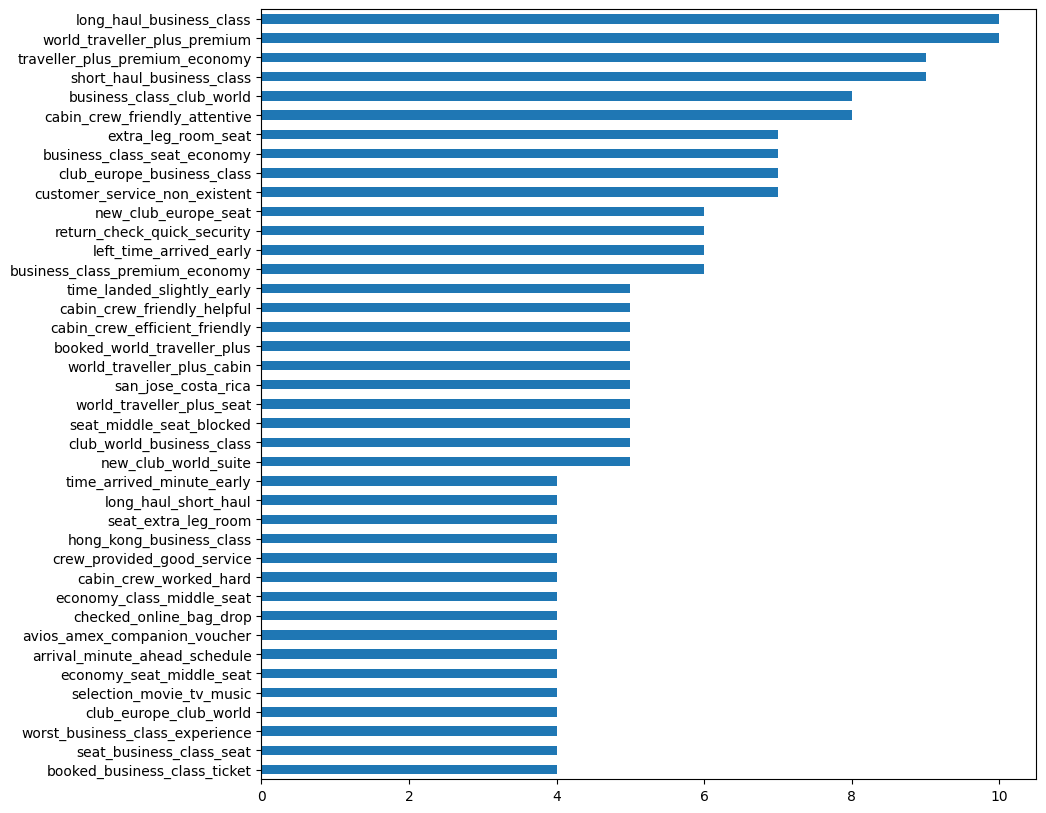

In [ ]:
## Imports
import nltk.collocations as collocations
from nltk import FreqDist, bigrams

reviews = " ".join(data.corpus)

#split the text of all reviews into a list of words
words = reviews.split(" ")

new_words = [word for word in words if word not in stopwords]

def get_freq_dist(new_words,number_of_ngrams ):
    from nltk import ngrams

    ## Generate bigrams
    ngrams = ngrams(new_words, number_of_ngrams)

    ## Creating FreqDist
    ngram_fd = FreqDist(ngrams).most_common(40)

    ## Sort values by highest frequency
    ngram_sorted = {k:v for k,v in sorted(ngram_fd, key=lambda item:item[1])}

    ## Join bigram tokens with '_' + maintain sorting
    ngram_joined = {'_'.join(k):v for k,v in sorted(ngram_fd, key=lambda item:item[1])}

    ## Convert to Pandas series for easy plotting
    ngram_freqdist = pd.Series(ngram_joined)
    plt.figure(figsize=(10,10))
    ax = ngram_freqdist.plot(kind="barh")

    return ax


get_freq_dist(new_words,4)

In [ ]:
ratings_1_3 = data[data.stars.isin([1,2,3])]
ratings_4_6 = data[data.stars.isin([4,5,6])]
ratings_7_10 = data[data.stars.isin([7,8,9,10])]

In [ ]:
reviews_1_3 = " ".join(ratings_1_3.corpus)
reviews_4_6 = " ".join(ratings_4_6.corpus)
reviews_7_10 = " ".join(ratings_7_10.corpus)

#split the text of all reviews into a list of words
words_1_3 = reviews_1_3.split(" ")
words_4_6 = reviews_4_6.split(" ")
words_7_10 = reviews_7_10.split(" ")

<Axes: >

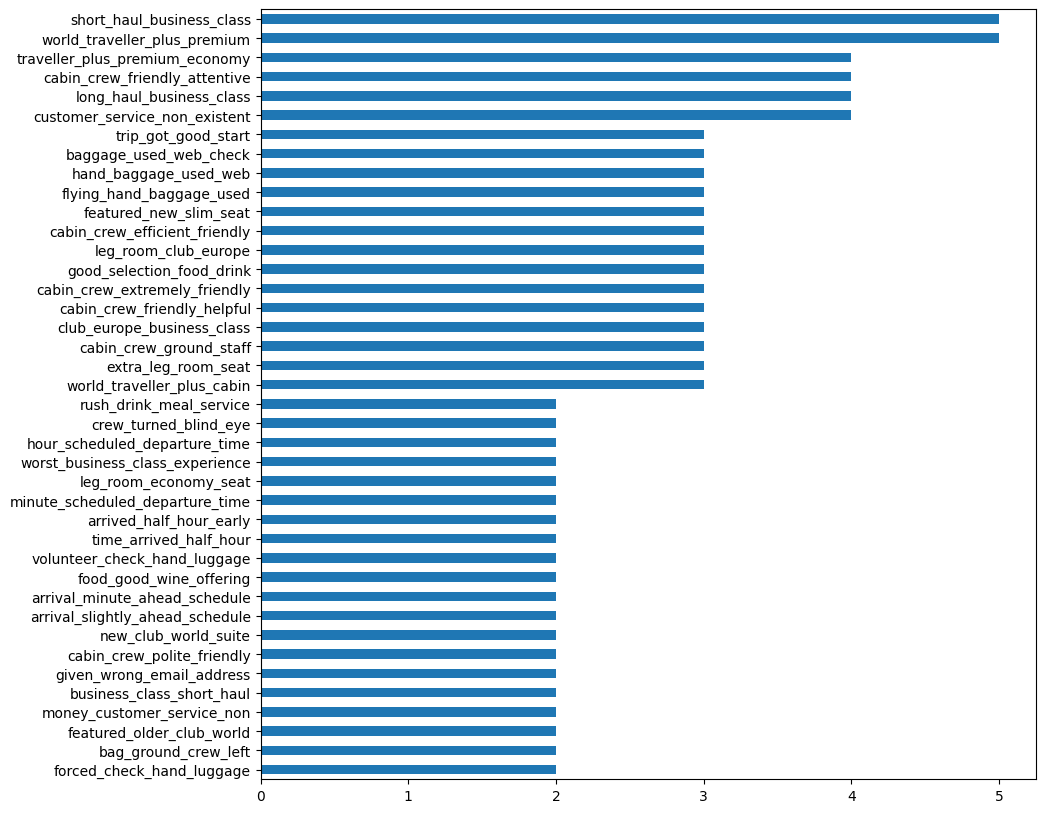

In [ ]:
new_words_7_10 = [word for word in words_7_10 if word not in stopwords]
get_freq_dist(new_words_7_10,4)

<Axes: >

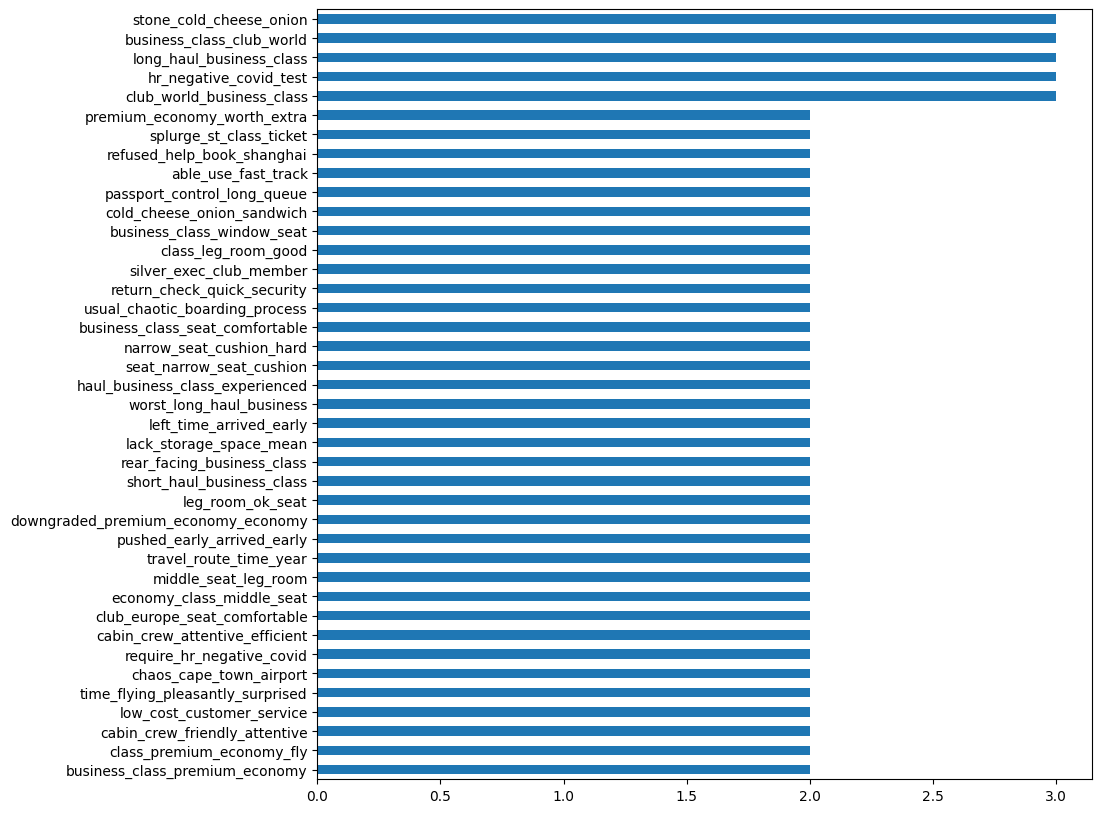

In [ ]:
new_words_4_6 = [word for word in words_4_6 if word not in stopwords]
get_freq_dist(new_words_4_6,4)

<Axes: >

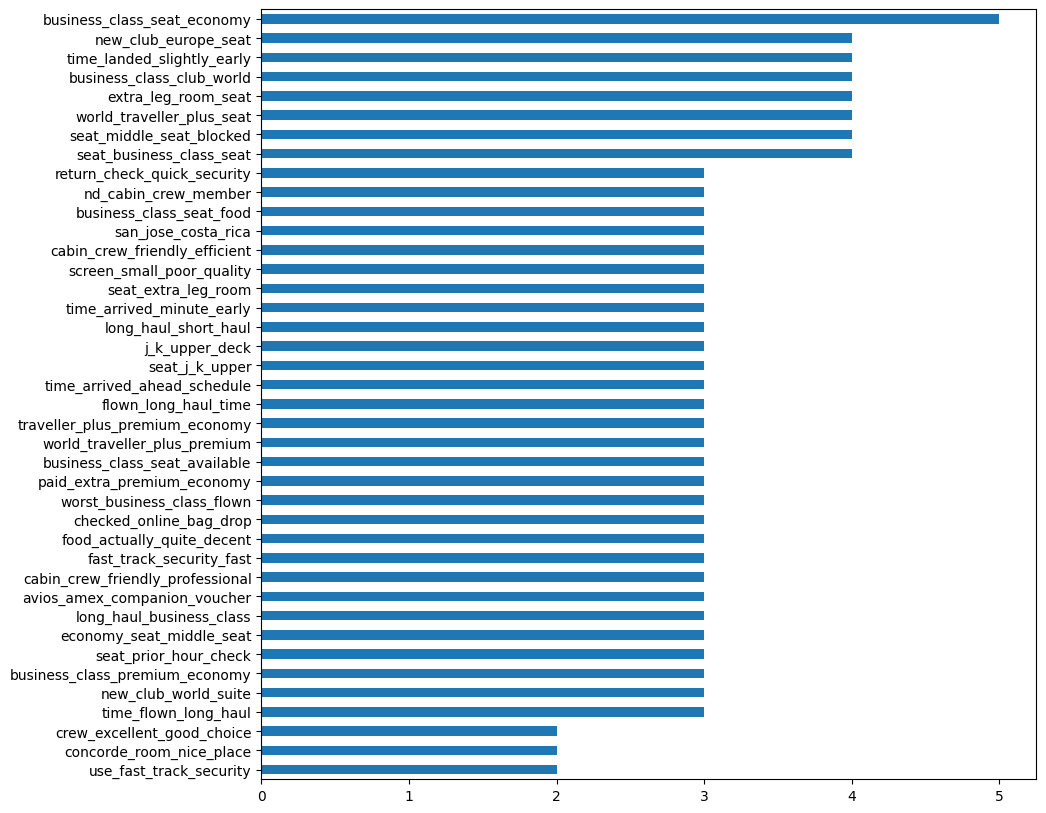

In [ ]:
new_words_1_3 = [word for word in words_1_3 if word not in stopwords]
get_freq_dist(new_words_1_3,4)

In [ ]:
%%capture
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
vds = SentimentIntensityAnalyzer()
# text = 'This is an extremely entertaining movie'

#set a column Polarity with all 0 values initially
data['label'] = 0

for i in range(len(data.corpus)):

    score = vds.polarity_scores(data.corpus[i])['compound']
    #print(score)
    if score > 0.2:
        data['label'][i] = 1
        #print("1st")
    elif score < 0:
        data['label'][i] = -1
        #print("2nd")
    else:
        data['label'][i] = 0

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
data.label.value_counts()

 1    2150
-1    1144
 0     119
Name: label, dtype: int64